<h1><center><font size="6">Cross-Validation Best Practices: Avoiding Data Leakage</font></center></h1>

<center><img src="https://cdn.vectorstock.com/i/1000x1000/94/87/hacker-with-credit-card-on-white-background-vector-31469487.webp" width="600"></center>


# <a id='0'>Table of Content</a>

- <a href='#1'>Gathering Insights from the Data</a>  
- <a href='#2'>Project Objective</a>  
- <a href='#3'>Load Packages</a>  
- <a href='#4'>Read the data</a>
- <a href='#5'>Check the data</a>  
- <a href='#6'>Check missing data</a>
- <a href='#7'>Check Data Distribution</a>
- <a href='#8'>Check Feature Distribution</a>
- <a href='#9'>Feature Scaling</a> 
- <a href='#10'>Data Preparation(Splitting for Final Model Evaluation)</a>
- <a href='#11'>Manual Undersampling(For Classifier Selection)</a>
- <a href='#12'>Equal Distribution(Balanced Dataset)</a>
- <a href='#13'>Correlation Analysis</a>
- <a href='#14'>Outlier Removal</a>
- <a href='#15'>Cross Validation Done Wrong</a>
- <a href='#16'>Cross Validation Done Right</a>
- <a href='#17'>Balancing the Scales: Optimizing with Near Miss Undersampling</a>
- <a href='#18'>Comparative Analysis: Overfitting Risks vs Best Practices in Undersampling</a>
- <a href='#19'>Classification Report(Undersampling)</a>
- <a href='#20'>Precision-Recall Curve(Undersampling)</a>
- <a href='#21'>Confusion Matrix(Undersampling)</a>
- <a href='#22'>SMOTE</a>
- <a href='#23'>Classification Report(SMOTE)</a>     
- <a href='#24'>Precision-Recall Curve(SMOTE)</a> 
- <a href='#25'>Confusion Matrix(SMOTE)</a> 
- <a href='#26'>Classification Report(All Classifiers)</a> 
- <a href='#27'>Conclusions</a>
- <a href='#28'>References</a>


# <a id="1">Gathering Insights from the Data</a> 

- This dataset represents transactions spanning a two-day period, encompassing 284,807 transactions. Notably, the dataset suffers from significant class imbalance, with fraudulent transactions accounting for a mere 0.172% of the total transactions.

**Key Features:**<br>

- The dataset consists solely of numerical input variables resulting from Principal Component Analysis (PCA), barring two features: 'Time' and 'Amount'.
- Features V1 through V28 represent principal components derived from PCA, while 'Time' denotes the time elapsed in seconds since the first transaction.
- The 'Amount' feature indicates the transaction amount and may be utilized for cost-sensitive learning approaches.
- The response variable 'Class' signifies the transaction's classification, taking a value of 1 for fraudulent transactions and 0 otherwise.

**Confidentiality Constraints:**<br>
 
- Due to confidentiality constraints, the original features and additional background information regarding the data are unavailable, limiting deeper insights into the underlying transactional characteristics.

**Data Transformation:**<br>

- Principal Component Analysis (PCA) has been applied to transform the original features into numerical principal components, ensuring anonymity and confidentiality.
- The 'Time' feature represents the temporal aspect of transactions, while the 'Amount' feature captures the transactional monetary value.

**Class Imbalance:**<br>

- The highly imbalanced nature of the dataset, with a disproportionately low incidence of fraudulent transactions, poses challenges for traditional machine learning approaches.
- Addressing this class imbalance is crucial to ensure the development of robust and effective fraud detection models.

# <a id="2">Project Objective</a> 

The objective of this project is to address the issue of class imbalance in a dataset containing fraudulent and non-fraudulent transactions. The primary goal is to develop and evaluate machine learning models capable of accurately classifying fraudulent transactions while minimizing false positives.The project will involve the following steps:

**Data Exploration and Preprocessing:**<br>

- Explore the dataset to understand its structure and identify missing values. 
- Visualize the class distribution to assess the data imbalance and examine the distributions of transaction time and amount.

**Data Preparation:**<br>

- Scale the transaction time and amount columns using Robust Scaler and split the dataset into training and testing sets for model development.

**Data Balancing:**<br>

- Employ undersampling of the majority class to create a balanced dataset for model training. 
- Visualize the class distribution of the balanced dataset and calculate correlation matrices for analysis.

**Model Building:**<br>

- Utilize GridSearchCV to optimize hyperparameters for classifiers and plot ROC curves to compare their performance. 
- Select the best-performing classifier based on evaluation metrics.

**Model Evaluation:**<br>

- Prevent data leakage by using Near Miss undersampling with cross-validation. 
- Calculate evaluation metrics for training and test data, generate classification reports, and plot precision-recall curves.

**Oversampling:**<br>

- Apply the SMOTE oversampling technique to the original dataset and evaluate classification metrics and precision-recall curves.

**Comparison:**<br>

- Compare the performance of Near Miss and SMOTE techniques for fraud detection and provide insights into the most effective approach for handling imbalanced datasets.

# <a id="3">Load Packages</a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import norm

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, roc_curve, classification_report,confusion_matrix
from collections import Counter
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import RobustScaler
import time
import warnings
warnings.filterwarnings("ignore")


# <a id="4">Read the data</a>

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# <a id="5">Check the Data</a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# <a id="6">Check Missing Data</a>

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# <a id="7">Check Data Distribution</a>

Class Distribution: Non-Fraud- 99.83% | Fraud- 0.17% of the dataset


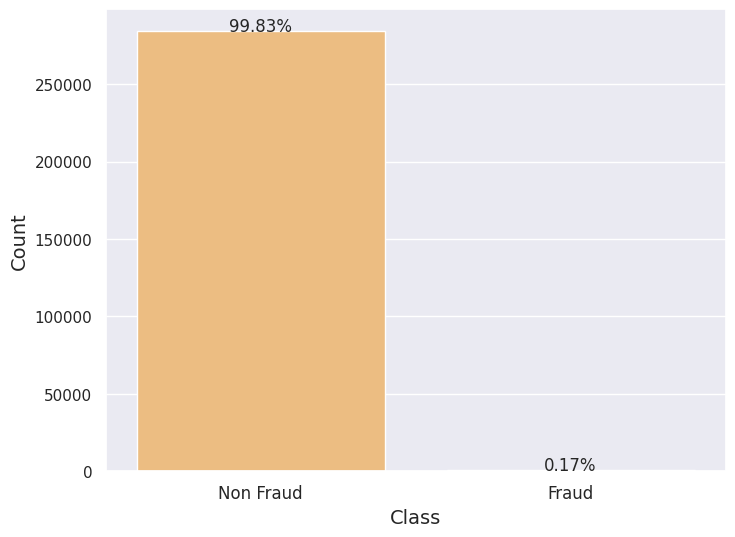

In [6]:
class_distribution = df['Class'].value_counts(normalize=True) * 100
print(f"Class Distribution: Non-Fraud- {class_distribution[0]:.2f}% | Fraud- {class_distribution[1]:.2f}% of the dataset")

sns.set(style="darkgrid")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=df, palette="RdYlBu")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 3, f"{height/len(df)*100:.2f}%", ha="center")

ax.set_xticklabels(['Non Fraud', 'Fraud'], fontsize=12)

plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()


**Note:**<br>
- The original dataset exhibits a significant class imbalance, with the majority of transactions being non-fraudulent. 
- Utilizing this dataset as the foundation for predictive modeling and analysis may lead to biased results and overfitting issues. 
- In such scenarios, algorithms tend to inaccurately assume the predominance of non-fraudulent transactions, compromising the model's ability to effectively identify fraud patterns. 
- Therefore, it is imperative to address this class imbalance to ensure that our model can discern subtle patterns indicative of fraudulent activity accurately.

# <a id="8">Check Feature Distribution</a>

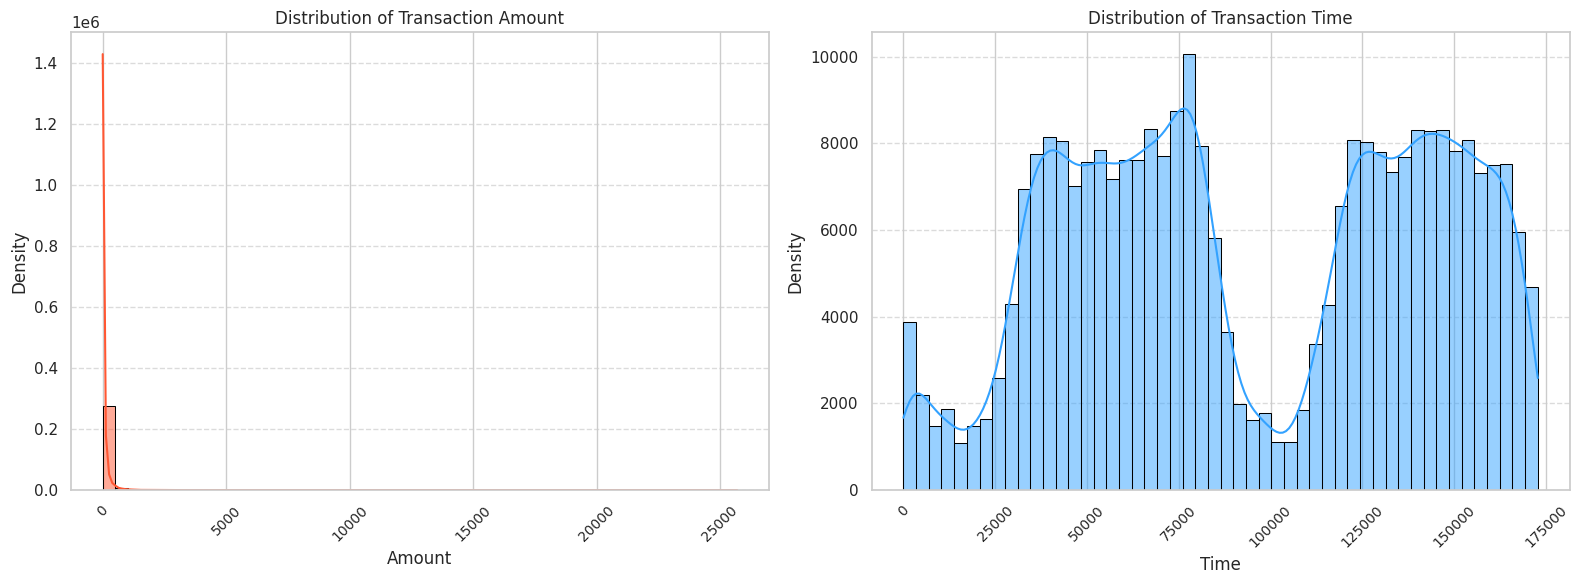

In [7]:
colors = ['#FF5733', '#33A2FF']
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df['Amount'], ax=ax[0], color=colors[0], kde=True, bins=50, edgecolor='black')
ax[0].set(title='Distribution of Transaction Amount', xlabel='Amount', ylabel='Density')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].tick_params(axis='x', rotation=45, labelsize=10)

sns.histplot(df['Time'], ax=ax[1], color=colors[1], kde=True, bins=50, edgecolor='black')
ax[1].set(title='Distribution of Transaction Time', xlabel='Time', ylabel='Density')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].tick_params(axis='x', rotation=45, labelsize=10)

plt.tight_layout()
plt.show()

**Distributions Analysis:** <br>
- Assessing the feature distributions offers valuable insights into their skewness, aiding in understanding their underlying patterns. 
- This examination also extends to exploring additional feature distributions for comprehensive analysis. 
- To address skewness issues, advanced techniques will be strategically implemented in subsequent iterations of this notebook.

# <a id="9">Feature Scaling</a>

- Let's focus on preprocessing the data for further analysis. 
- Firstly, we perform feature scaling on the 'Time' and 'Amount' columns to bring them to a similar scale as the other features in the dataset. 
- This ensures that no single feature dominates the learning algorithm due to its larger magnitude. 


In [8]:
rob_scaler = RobustScaler()
features_to_scale = ['Amount', 'Time']

df[features_to_scale] = rob_scaler.fit_transform(df[features_to_scale])
df.rename(columns={feature: f'scaled_{feature}' for feature in features_to_scale}, inplace=True)

df.head()

,scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


# <a id="10">Data Preparation(Splitting for Final Model Evaluation)</a>

- Before applying the Random UnderSampling technique, it is imperative to separate the original dataframe into training and testing sets. 
- This separation is essential for testing purposes. 
- While we perform data splitting during the implementation of sampling techniques such as Random UnderSampling or OverSampling, it is crucial to evaluate our models on the original testing set rather than the testing set created by these techniques.
- The primary objective is to fit the model with both the undersampled/oversampled dataframes to enable the detection of patterns effectively. Subsequently, we evaluate the model's performance on the original testing set, ensuring a robust assessment of its generalization capabilities.

In [9]:
print('No Frauds:', round(df['Class'].value_counts(normalize=True)[0] * 100, 2), '% of the dataset')
print('Frauds:', round(df['Class'].value_counts(normalize=True)[1] * 100, 2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    Original_Xtrain, Original_Xtest = X.iloc[train_index], X.iloc[test_index]
    Original_ytrain, Original_ytest = y.iloc[train_index], y.iloc[test_index]


Original_Xtrain, Original_Xtest, Original_ytrain, Original_ytest = map(np.array, [Original_Xtrain, Original_Xtest, Original_ytrain, Original_ytest])

train_unique_label, train_counts_label = np.unique(Original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(Original_ytest, return_counts=True)


No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


# <a id="11">Manual Undersampling(For Classifier Selection)</a>

To address the class imbalance issue in the dataset, manual under sampling is implemented with the following steps:

**Shuffling the Dataset:**<br>
- The original dataset is shuffled to ensure randomness in subsequent steps.

**Selecting Fraud and Non-Fraud Instances:**<br>
- Two subsets are created based on the class labels:
- Fraudulent Transactions (Class = 1): All instances labeled as fraud are selected.
- Non-Fraudulent Transactions (Class = 0): A subset of non-fraud instances is sampled to match the count of fraud instances (492 instances).

**Creating Balanced Dataset:**<br>
- The fraud and non-fraud subsets are concatenated to form a balanced dataset, where both classes have an equal number of instances.

**Shuffling the Balanced Dataset:**<br>
- Finally, the balanced dataset is shuffled again to randomize the order of instances.

<b>Undersampling, whether conducted manually or through specific techniques, should ideally occur within the context of cross-validation. This approach was adopted to select the most suitable classifier from the reduced dataset, which will subsequently undergo evaluation on the original dataset.</b>


In [10]:
df_shuffled = df.sample(frac=1, random_state=42)

fraud_df = df_shuffled[df_shuffled['Class'] == 1]
non_fraud_df = df_shuffled[df_shuffled['Class'] == 0][:492]

balanced_df = pd.concat([fraud_df, non_fraud_df])

balanced_df = balanced_df.sample(frac=1, random_state=42)
balanced_df.head()

,scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_Amount,Class
146884,0.038170,2.054361,-0.122642,-1.245717,0.189567,0.132497,-0.620765,0.059581,-0.148058,0.338940,...,-0.271204,-0.687048,0.271569,-0.497120,-0.270115,0.208619,-0.076075,-0.075428,-0.293579,0
95597,-0.226824,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,...,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,18.615944,1
96768,-0.220456,0.955253,-0.833374,0.847147,0.725970,-1.322868,-0.238842,-0.565347,0.022443,-0.762247,...,-0.110554,-0.129397,-0.040892,0.364872,0.204756,-0.304578,0.055908,0.062489,1.872424,0
75511,-0.335930,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,...,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,2.080905,1
255556,0.852830,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,...,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,-0.296653,1


# <a id="12">Equal Distribution(Balanced Dataset)</a>

With our balanced dataframe in place, we can proceed with a deeper analysis and data preprocessing.

Distribution of the Classes in the subsample dataset:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


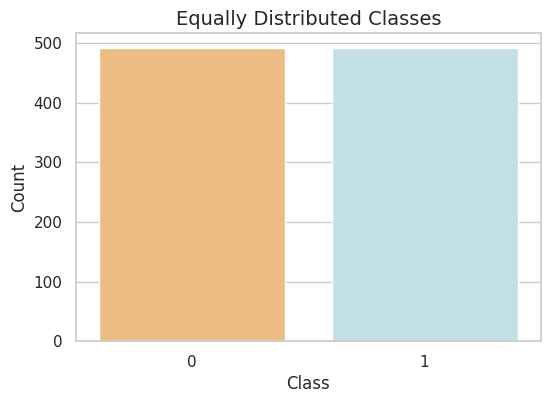

In [11]:
class_distribution = balanced_df['Class'].value_counts(normalize=True)
print('Distribution of the Classes in the subsample dataset:')
print(class_distribution)

qualitative_palette = "RdYlBu"
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=balanced_df, palette=qualitative_palette)
plt.title('Equally Distributed Classes', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# <a id="13">Correlation Analysis</a>

Correlation matrices are essential for understanding our data and identifying features that significantly influence whether a transaction is fraudulent. Using the correct dataframe (subsample) is crucial for accurately assessing correlations with fraud transactions.

**Summary and Explanation:**

**Negative Correlations:** Features V16, V14, V12, and V10 exhibit negative correlations with fraud transactions. Lower values in these features are associated with a higher likelihood of fraud.

**Positive Correlations:** Features V2, V4, V11, and V19 show positive correlations with fraud transactions. Higher values in these features indicate a greater probability of fraud.

**Boxplots:** Utilizing boxplots allows for a clearer visualization of feature distributions between fraudulent and non-fraudulent transactions.

<b>It's imperative to use the subsample in our correlation matrix to mitigate the impact of class imbalance on our analysis. This ensures a more accurate assessment of correlations with fraud.</b>

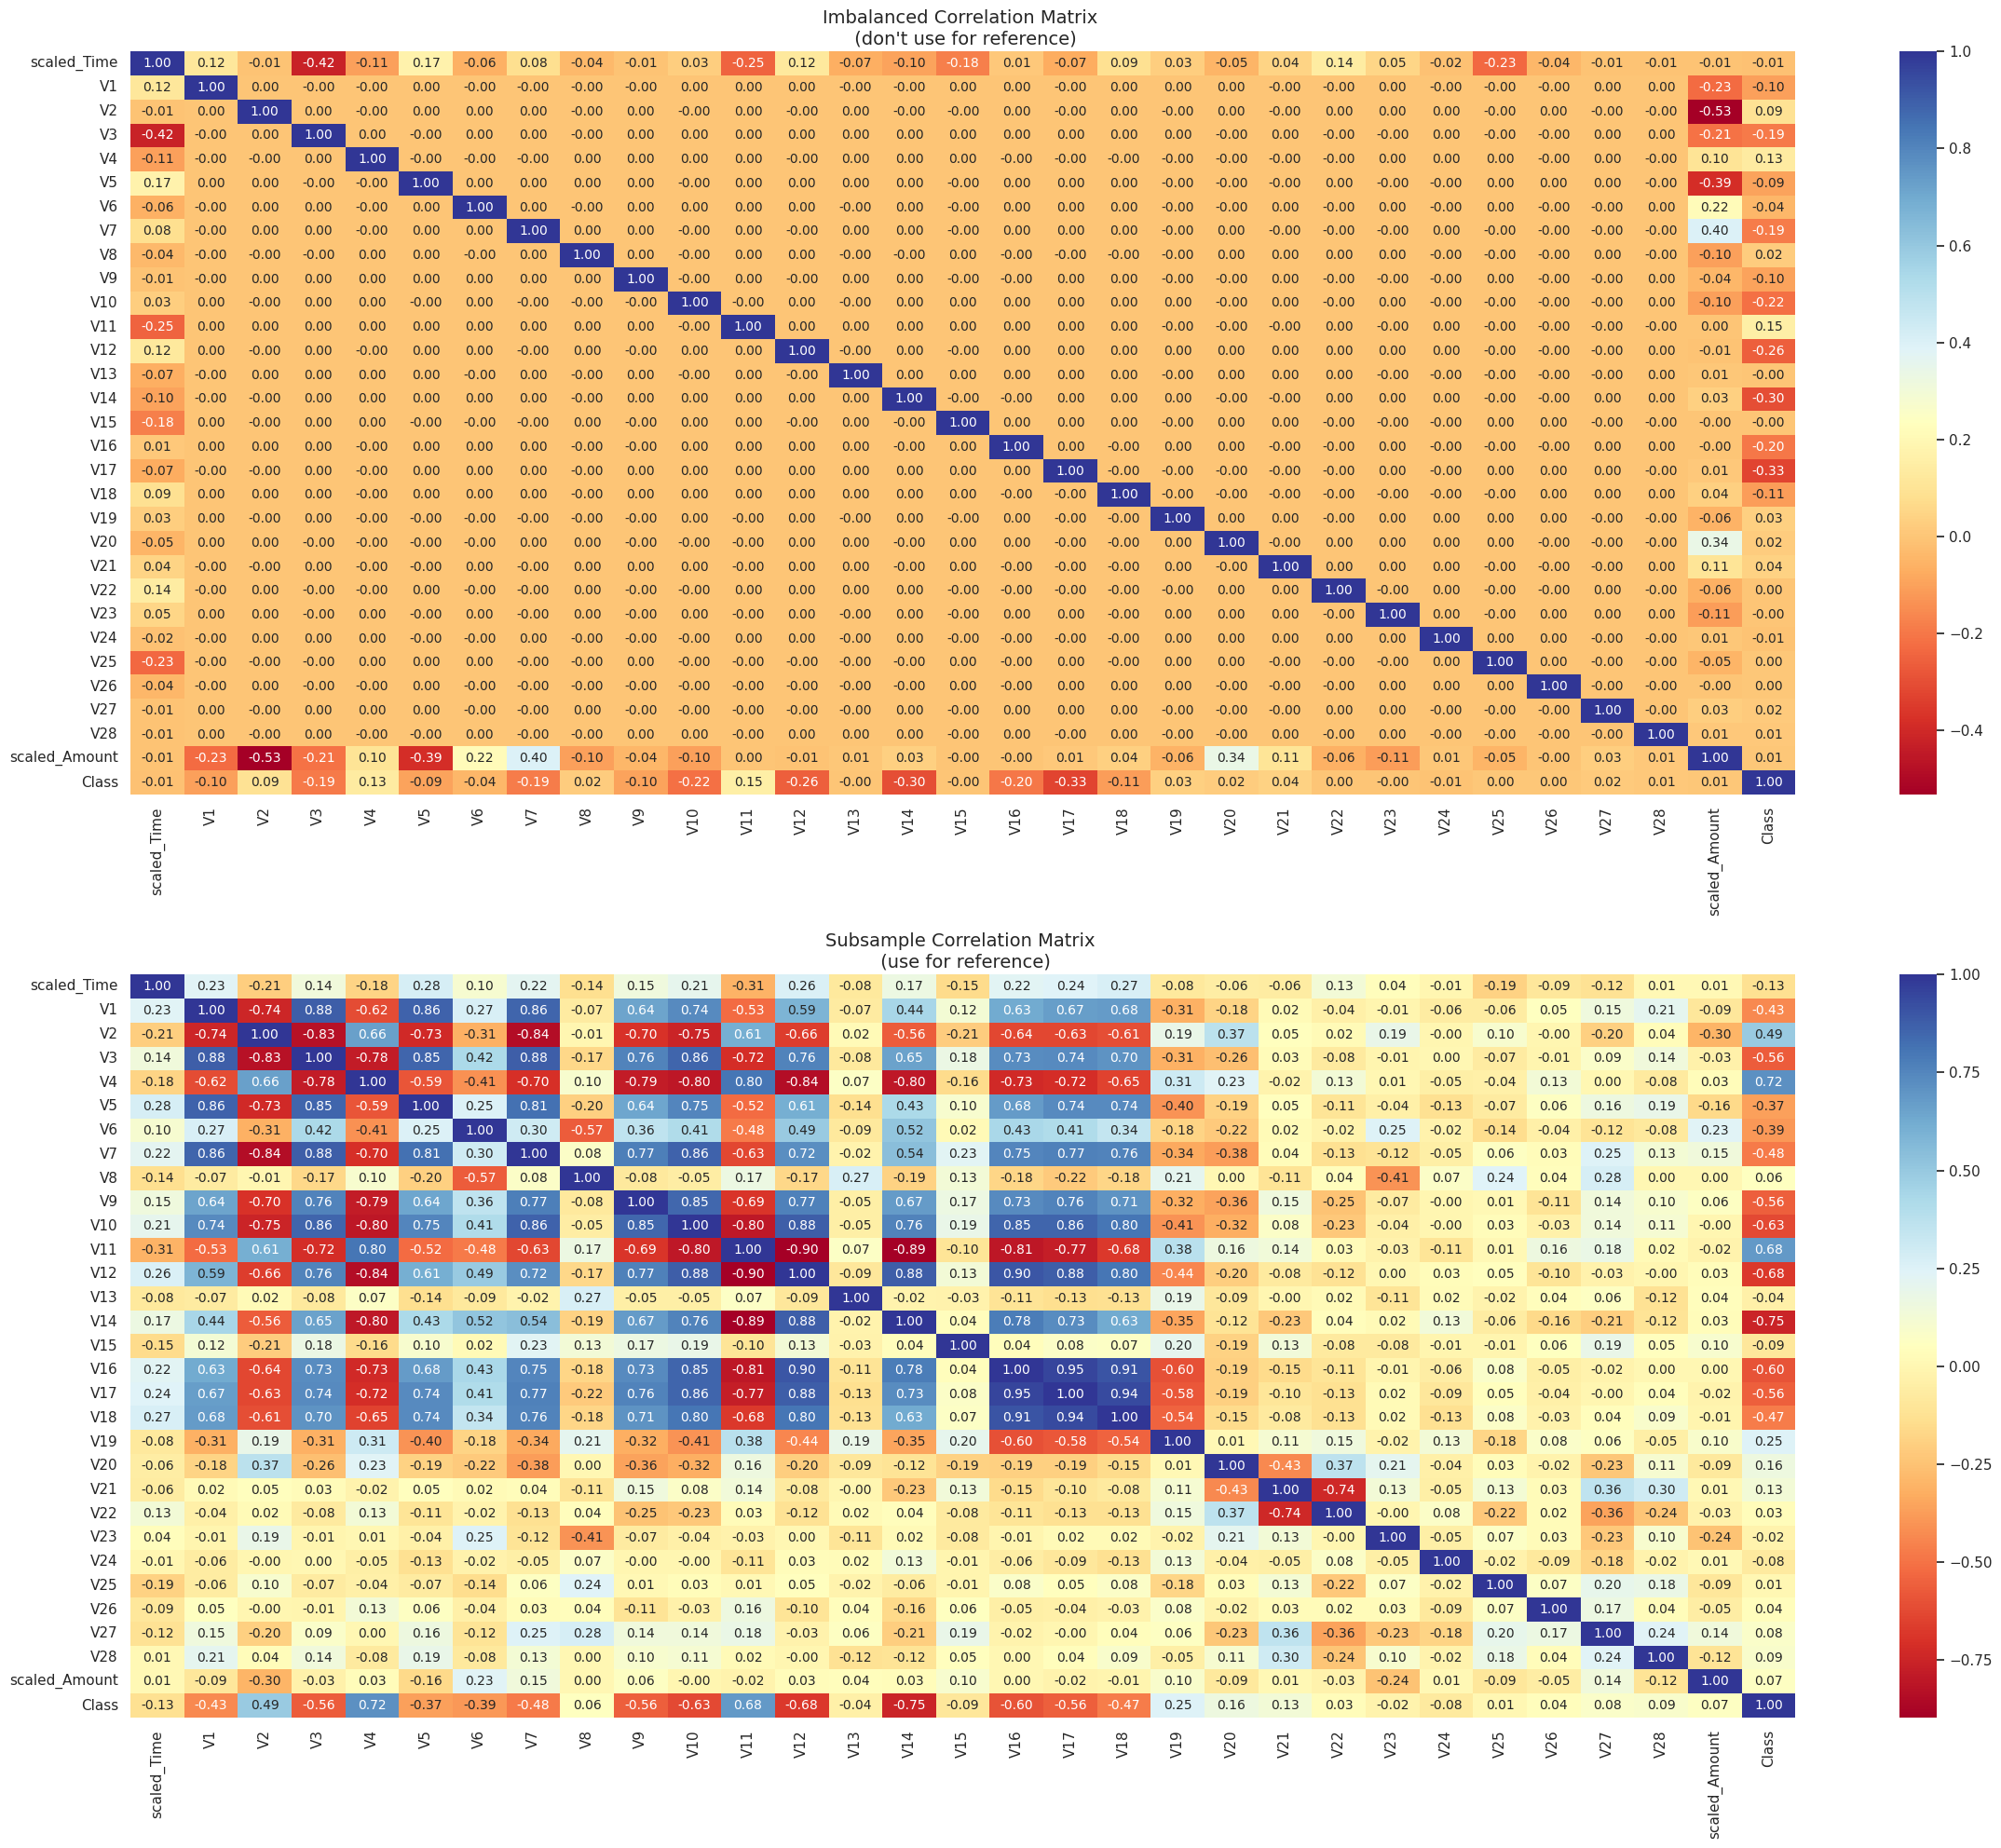

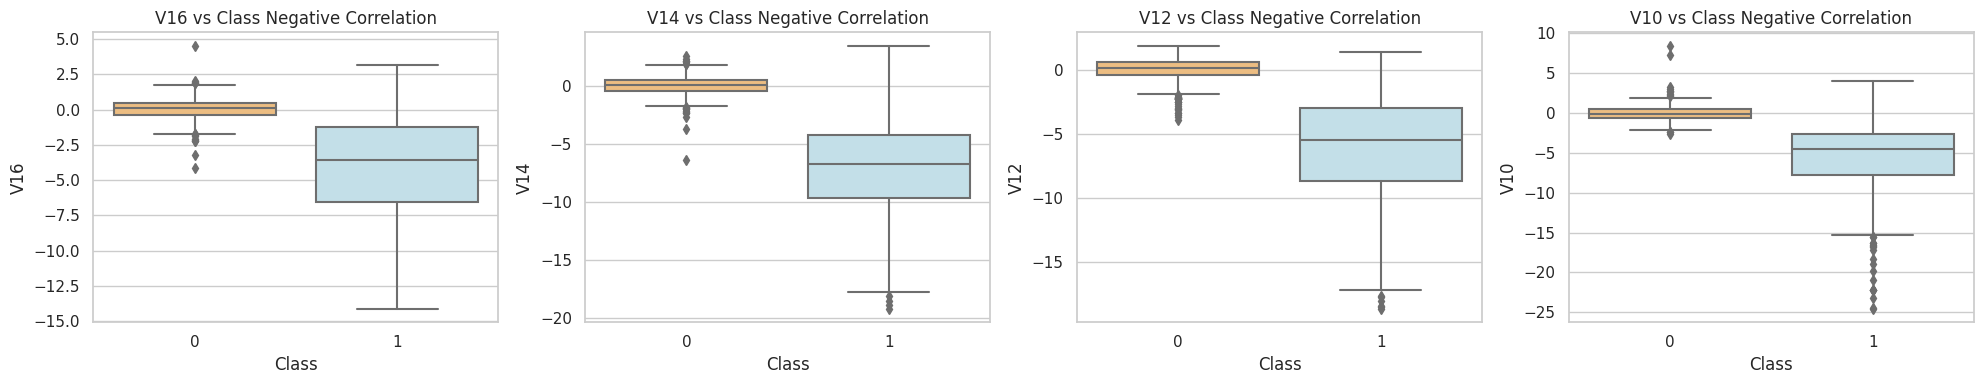

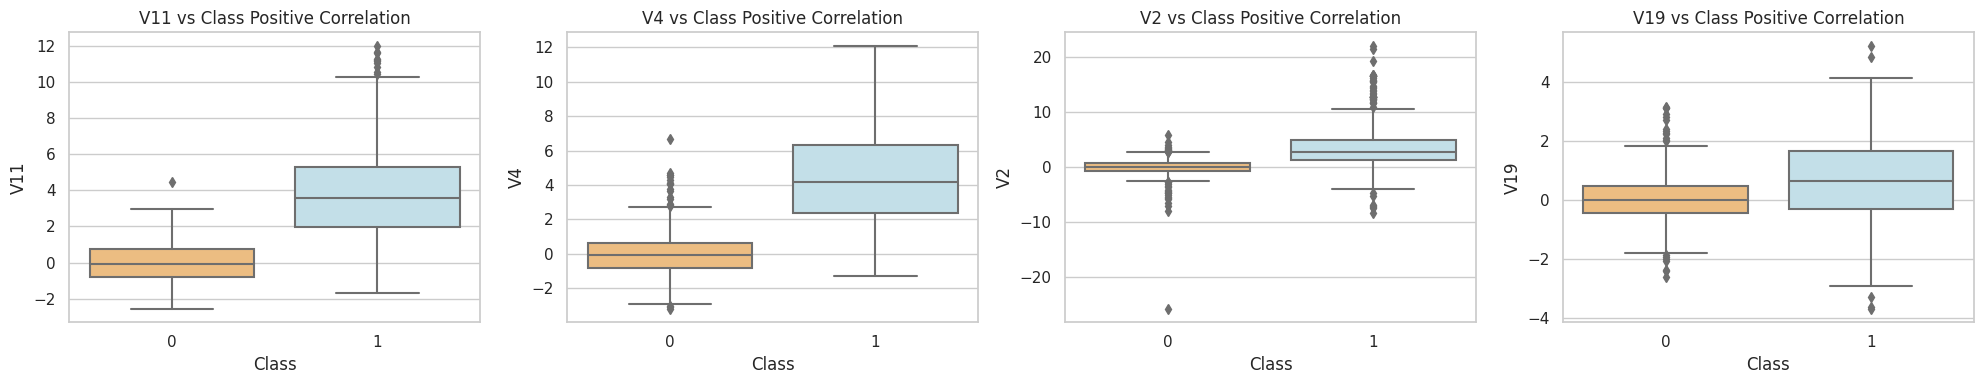

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 20))

corr_imbalanced = df.corr()
corr_subsample = balanced_df.corr()

palette_name = "RdYlBu"

for ax, corr_matrix, title in zip([ax1, ax2], [corr_imbalanced, corr_subsample], ['Imbalanced', 'Subsample']):
    sns.heatmap(corr_matrix, cmap=palette_name, annot=True, annot_kws={'size': 10}, fmt=".2f", ax=ax)
    ax.set_title(f'{title} Correlation Matrix \n (use for reference)' if title == 'Subsample' else f"{title} Correlation Matrix \n (don't use for reference)", fontsize=14)

plt.tight_layout()
plt.show()

qualitative_palette = "RdYlBu"

fig, axes = plt.subplots(ncols=4, figsize=(20, 4))

neg_corr_features = ['V16', 'V14', 'V12', 'V10']

for ax, feature in zip(axes, neg_corr_features):
    sns.boxplot(x="Class", y=feature, data=balanced_df, palette=qualitative_palette, ax=ax)
    ax.set_title(f'{feature} vs Class Negative Correlation')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=4, figsize=(20, 4))

pos_corr_features = ['V11', 'V4', 'V2', 'V19']

for ax, feature in zip(axes, pos_corr_features):
    sns.boxplot(x="Class", y=feature, data=balanced_df, palette=qualitative_palette, ax=ax)
    ax.set_title(f'{feature} vs Class Positive Correlation')

plt.tight_layout()
plt.show()

# <a id="14">Outlier Removal</a>

This code segment focuses on identifying and removing outliers from specific features ('V14', 'V12', 'V10') in the dataset containing balanced samples of fraudulent and non-fraudulent transactions.

**Distribution Analysis:**

- For each feature, a distribution plot and a boxplot are generated.
- The distribution plot visualizes the distribution of feature values for fraudulent transactions.
- The boxplot illustrates the distribution of feature values between fraudulent and non-fraudulent transactions, aiding in outlier identification.

**Outlier Removal:**

- In our case Outliers are detected using the Interquartile Range (IQR) method.
- The lower and upper bounds are calculated based on the first and third quartiles of the feature values for fraudulent transactions.
- Any values outside the defined bounds are considered outliers and subsequently removed from the dataset.

**Purpose:**

- Outliers, if not addressed, can distort the distribution and affect the performance of machine learning models.
- Removing outliers ensures that the data used for training models is more representative and reliable, leading to improved model accuracy and robustness.

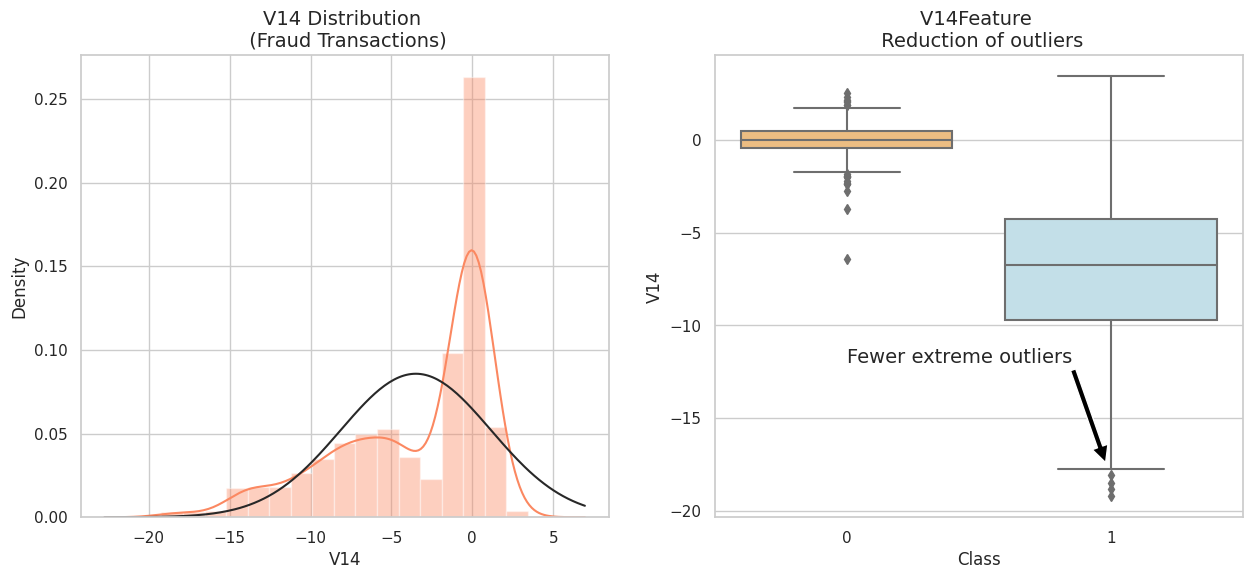

V14 Outliers for Fraud Cases: 4
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
V14 Outlier Values: [-19.2143254902614, -18.0499976898594, -18.4937733551053, -18.8220867423816]
-----------------------------------------------------------------------------------------------------------------------------


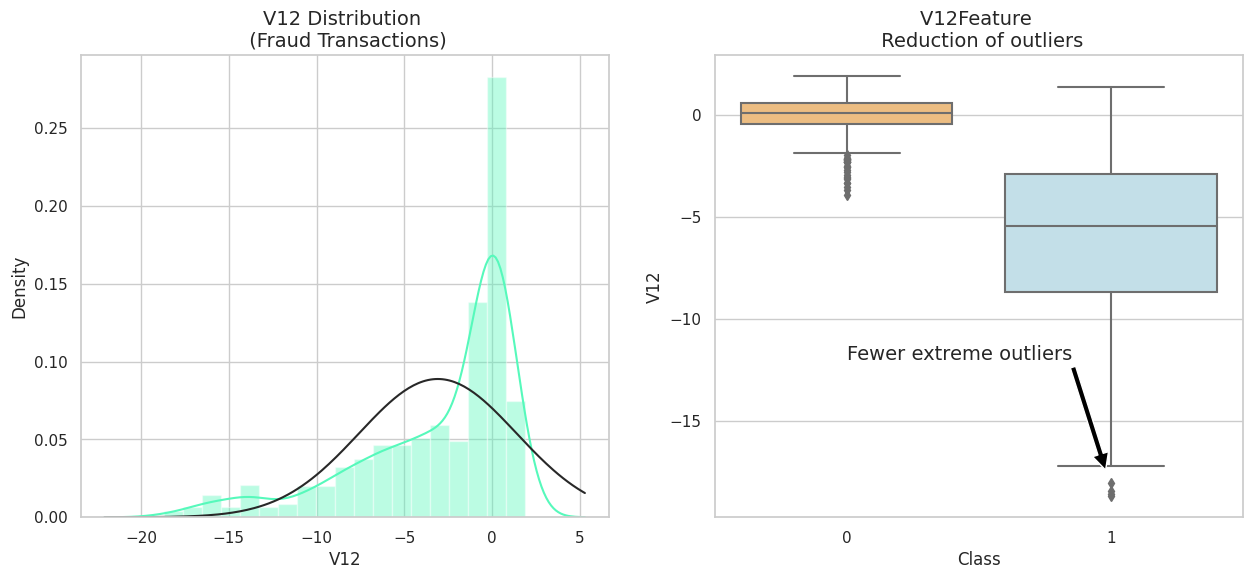

V12 Outliers for Fraud Cases: 4
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 Outlier Values: [-18.6837146333443, -18.5536970096458, -18.0475965708216, -18.4311310279993]
-----------------------------------------------------------------------------------------------------------------------------


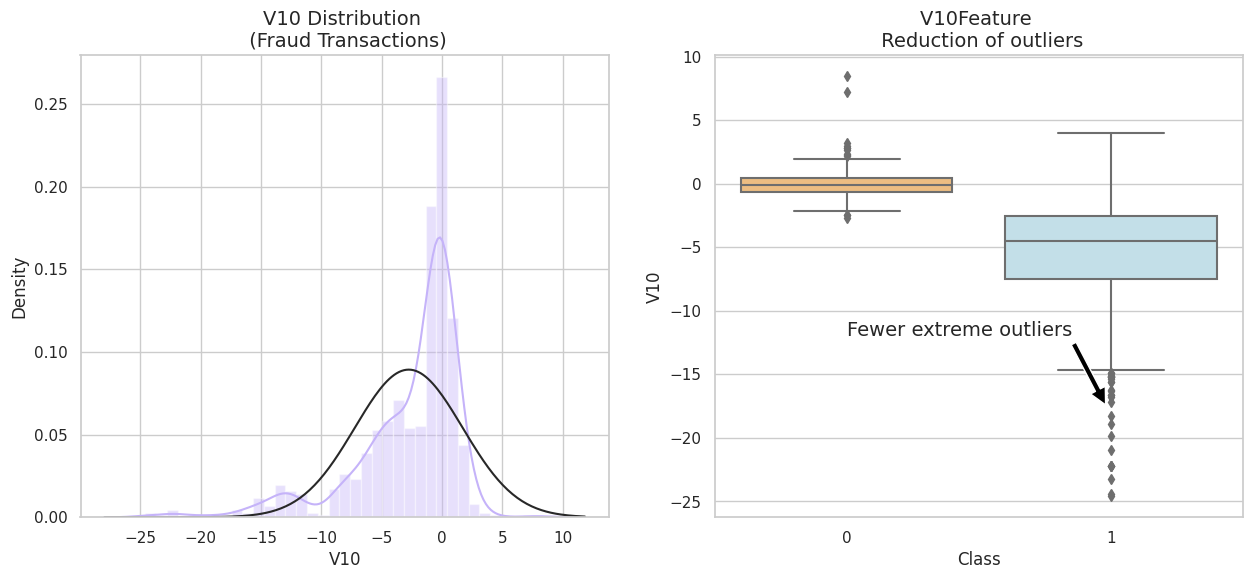

V10 Outliers for Fraud Cases: 27
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 Outlier Values: [-15.5637913387301, -22.1870885620007, -24.4031849699728, -15.2399619587112, -16.3035376590131, -15.5637913387301, -18.9132433348732, -15.1241628144947, -22.1870885620007, -16.6496281595399, -22.1870885620007, -16.7460441053944, -16.6011969664137, -17.1415136412892, -18.2711681738888, -16.2556117491401, -15.1237521803455, -15.3460988468775, -14.9246547735487, -15.2399619587112, -22.1870885620007, -20.9491915543611, -19.836148851696, -15.2318333653018, -24.5882624372475, -14.9246547735487, -23.2282548357516]
-----------------------------------------------------------------------------------------------------------------------------


In [13]:
def plot_distribution_and_boxplot(feature, color, data):
    plt.figure(figsize=(15, 6))
    
    # Plot distribution chart
    plt.subplot(1, 2, 1)
    sns.distplot(data[feature], fit=norm, color=color)
    plt.title(f'{feature} Distribution \n (Fraud Transactions)', fontsize=14)
    
    # Plot box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x="Class", y=feature, data=data, palette="RdYlBu")
    plt.title(f'{feature}Feature \n Reduction of outliers', fontsize=14)
   
  # Annotate boxplot with text
    ax = plt.gca()
    ax.annotate('Fewer extreme outliers', xy=(0.98, -17.4), xytext=(0, -12),
                arrowprops=dict(facecolor='black'),
                fontsize=14)

    plt.show()

def remove_outliers_and_print_info(feature, data):
    fraud_values = data[feature].loc[data['Class'] == 1].values
    q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
    iqr = q75 - q25

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    # Identify outliers
    outliers = [x for x in fraud_values if x < lower or x > upper]

    print(f'{feature} Outliers for Fraud Cases: {len(outliers)}')
    print(f'{feature} Lower: {lower}')
    print(f'{feature} Upper: {upper}')
    print(f'{feature} Outlier Values: {outliers}')

    # Remove outliers
    data = data.drop(data[(data[feature] > upper) | (data[feature] < lower)].index)

    print('-' * 125)
    return data

# Features and colors
features = ['V14', 'V12', 'V10']
colors = ['#FB8861', '#56F9BB', '#C5B3F9']

# Iterate over features
for feature, color in zip(features, colors):
    plot_distribution_and_boxplot(feature, color, balanced_df)
    balanced_df = remove_outliers_and_print_info(feature, balanced_df)


# <a id='15'>Cross Validation Done Wrong</a>

Using an already undersampled dataset for cross-validation can lead to biased and overly optimistic performance estimates. Here's an overview of the code and the potential issues with its approach:

**Overview of the Code:**<br>
- The code begins by splitting the undersampled dataset into features (X) and the target variable (y).
- Then, it divides the data into training and testing sets using the train_test_split function.
- Next, it defines a dictionary of classifiers, including Logistic Regression, K-Nearest Neighbors, Support Vector Classifier, and Random Forest Classifier.
- For each classifier, it fits the model to the training data and evaluates its performance using 5-fold cross-validation.
- Additionally, it performs hyperparameter tuning for each classifier using GridSearchCV to find the best parameters.
- Finally, it computes the area under the ROC curve (AUC-ROC) for each classifier and plots the ROC curve for comparison.

**Issues with this Approach:**

**Data Leakage:**<br>
- Using the undersampled dataset for both training and evaluation within the cross-validation process can lead to data leakage. - Cross-validation should be performed on the original, imbalanced dataset to obtain unbiased performance estimates. Undersampling should be applied within each fold of cross-validation to prevent data leakage.

**Overfitting:**<br>
- By evaluating models on an already undersampled dataset, the classifiers may appear to perform better than they would on unseen data. This is because the models are trained and evaluated on a subset of the data that may not accurately represent the true distribution of the classes.

**Limited Generalization:**<br>
- The models trained and evaluated on an undersampled dataset may not generalize well to the original, imbalanced dataset.
- This can result in misleading conclusions about the models' performance in real-world scenarios.

**Recommendations for Improvement:**<br>
- Perform cross-validation on the original, imbalanced dataset to obtain unbiased performance estimates.
- Apply undersampling or other balancing techniques within each fold of cross-validation to prevent data leakage and ensure fair evaluation.
- Evaluate the models' performance metrics, such as precision, recall, and F1-score, in addition to the AUC-ROC curve, to assess their effectiveness in detecting fraud cases.
- Consider other approaches for handling class imbalance, such as oversampling, synthetic data generation, which can handle imbalanced datasets more effectively.

In summary, while the code demonstrates the training and evaluation of classifiers, it uses an undersampled dataset improperly for cross-validation, leading to biased performance estimates and limited generalization to real-world scenarios. It's essential to use proper techniques for handling class imbalance and ensure robust model evaluation on representative datasets.

In [14]:
X_balanced = balanced_df.drop('Class', axis=1)
y_balanced = balanced_df['Class']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    
X_train_balanced = X_train_balanced.values
X_test_balanced = X_test_balanced.values
y_train_balanced = y_train_balanced.values
y_test_balanced = y_test_balanced.values 

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train_balanced, y_train_balanced)
    training_score = cross_val_score(classifier, X_train_balanced, y_train_balanced, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

    

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 93.0 % accuracy score


In [15]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_balanced, y_train_balanced)
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(1,10,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train_balanced, y_train_balanced)
knears_neighbors = grid_knears.best_estimator_

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train_balanced, y_train_balanced)
svc = grid_svc.best_estimator_

rf_params = {
    "n_estimators": [100],
    "criterion": ["gini", "entropy"],
    "max_depth": [None],
    "min_samples_split": [2],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2P'],
}

grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train_balanced, y_train_balanced)
rf_clf = grid_rf.best_estimator_
    

Logistic Regression Cross Validation Score:  94.32%
Knears Neighbors Cross Validation Score 94.06%
Support Vector Classifier Cross Validation Score 93.92%
Random Forest Classifier Cross Validation Score 94.06%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Logistic Regression:  0.9695887764102995
KNears Neighbors:  0.9377248988392769
Support Vector Classifier:  0.9788437574382883
Random Forest Classifier:  0.9367587964324218


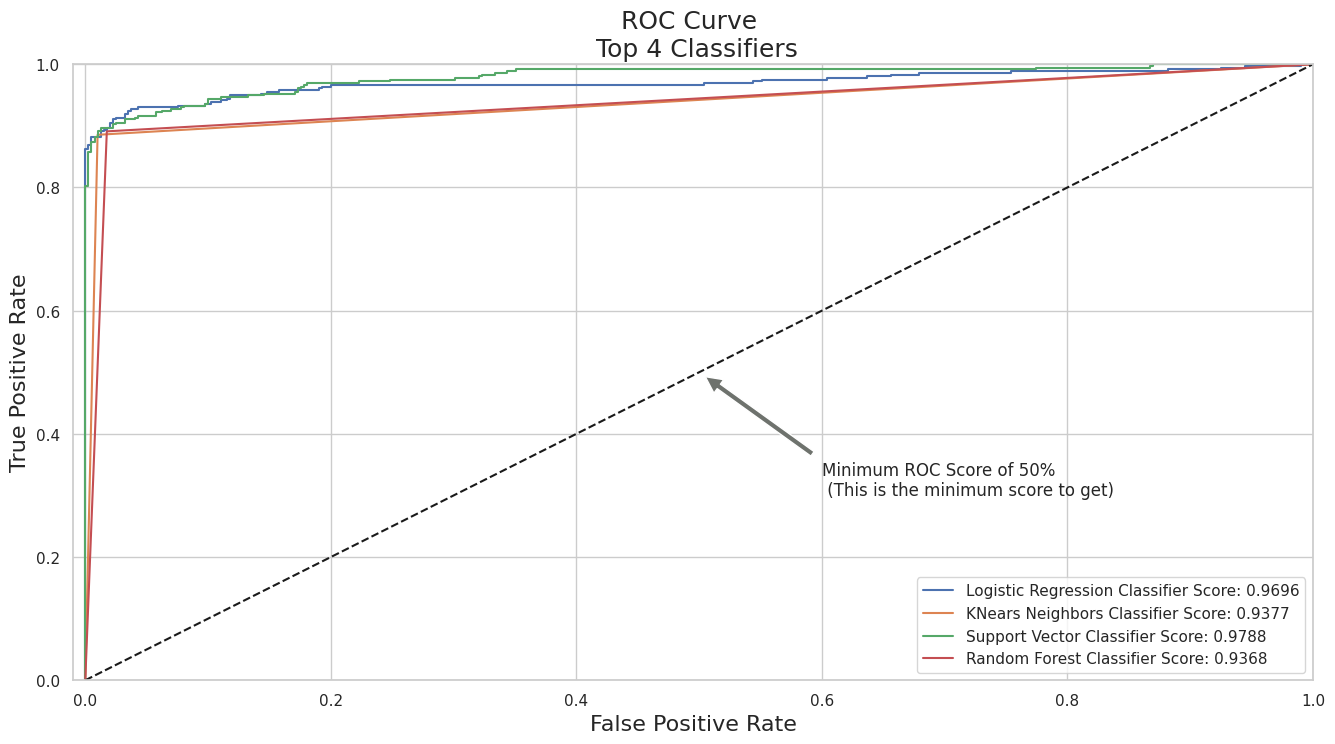

In [16]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Cross Validation Scores
log_reg_score = cross_val_score(log_reg, X_train_balanced, y_train_balanced, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train_balanced, y_train_balanced, cv=5) 
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train_balanced, y_train_balanced, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

Rf_score = cross_val_score(rf_clf, X_train_balanced, y_train_balanced, cv=5)
print('Random Forest Classifier Cross Validation Score', round(Rf_score.mean() * 100, 2).astype(str) + '%') 
print("--"*100)

# Cross-Validated Predictions
log_reg_pred = cross_val_predict(log_reg, X_train_balanced, y_train_balanced, cv=5, method="decision_function")
knears_pred = cross_val_predict(knears_neighbors, X_train_balanced, y_train_balanced, cv=5)
svc_pred = cross_val_predict(svc, X_train_balanced, y_train_balanced, cv=5, method="decision_function")
Rf_pred = cross_val_predict(rf_clf, X_train_balanced, y_train_balanced, cv=5)

# ROC AUC Scores
print('Logistic Regression: ', roc_auc_score(y_train_balanced, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train_balanced, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train_balanced, svc_pred))
print('Random Forest Classifier: ', roc_auc_score(y_train_balanced, Rf_pred))

# ROC Curve Data
log_fpr, log_tpr, log_thresold = roc_curve(y_train_balanced, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train_balanced, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train_balanced, svc_pred)
Rf_fpr, Rf_tpr, Rf_threshold = roc_curve(y_train_balanced, Rf_pred)

# Function to Plot ROC Curves
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, Rf_fpr, Rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train_balanced, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train_balanced, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train_balanced, svc_pred)))
    plt.plot(Rf_fpr, Rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train_balanced, Rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
    plt.legend()

# Plotting the ROC Curves
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, Rf_fpr, Rf_tpr)
plt.show()


# <a id="16">Cross Validation Done Right</a>

# <a id="17">Balancing the Scales: Optimizing with Near Miss Undersampling</a>

- The code implements undersampling within a logistic regression model to address class imbalance, using stratified k-fold cross-validation for evaluation. 
- It correctly applies undersampling to only the training data during each fold, avoiding data leakage by ensuring the model is tested on untouched original test data. 
- This approach maintains the integrity of the evaluation metrics (accuracy, precision, recall, F1 score, and AUC), providing a reliable assessment of the model's performance.


In [17]:
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

for train_index, test_index in skf.split(undersample_X, undersample_y):
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

    print("Before undersampling - Class distribution in y_train:", undersample_ytrain.value_counts())

    undersample_pipeline = make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    undersample_model = undersample_pipeline.fit(undersample_Xtrain, undersample_ytrain)
    undersample_prediction = undersample_model.predict(Original_Xtest)
    
    undersample_accuracy.append(undersample_model.score(Original_Xtest, Original_ytest))
    undersample_precision.append(precision_score(Original_ytest, undersample_prediction))
    undersample_recall.append(recall_score(Original_ytest, undersample_prediction))
    undersample_f1.append(f1_score(Original_ytest, undersample_prediction))
    undersample_auc.append(roc_auc_score(Original_ytest, undersample_prediction))

    # Print class distribution after undersampling
    undersample_Xtrain_resampled, undersample_ytrain_resampled = undersample_model.named_steps['nearmiss'].fit_resample(undersample_Xtrain, undersample_ytrain)
    print("After undersampling - Class distribution in y_train:", undersample_ytrain_resampled.value_counts())
    
print("undersample_accuracy: {}".format(np.mean(undersample_accuracy)))
print("undersample_precision: {}".format(np.mean(undersample_precision)))
print("undersample_recall: {}".format(np.mean(undersample_recall)))
print("undersample_f1: {}".format(np.mean(undersample_f1)))
print("undersample_auc: {}".format(np.mean(undersample_auc)))


Before undersampling - Class distribution in y_train: Class
0    227452
1       393
Name: count, dtype: int64
After undersampling - Class distribution in y_train: Class
0    393
1    393
Name: count, dtype: int64
Before undersampling - Class distribution in y_train: Class
0    227452
1       393
Name: count, dtype: int64
After undersampling - Class distribution in y_train: Class
0    393
1    393
Name: count, dtype: int64
Before undersampling - Class distribution in y_train: Class
0    227452
1       394
Name: count, dtype: int64
After undersampling - Class distribution in y_train: Class
0    394
1    394
Name: count, dtype: int64
Before undersampling - Class distribution in y_train: Class
0    227452
1       394
Name: count, dtype: int64
After undersampling - Class distribution in y_train: Class
0    394
1    394
Name: count, dtype: int64
Before undersampling - Class distribution in y_train: Class
0    227452
1       394
Name: count, dtype: int64
After undersampling - Class distributi

# <a id="18">Comparative Analysis: Overfitting Risks vs Best Practices in Undersampling</a>

**The Overfitting Scenario**

The first part of the code evaluates a logistic regression model's performance metrics—accuracy, precision, recall, F1 score, and AUC—on a balanced training set (y_train_balanced) that has already undergone undersampling prior to the splitting for cross-validation. This practice can inadvertently lead to overfitting. When a model is trained and validated on the same data it was tuned for (in this case, an undersampled dataset), it may perform exceptionally well on this specific dataset but fail to generalize to new, unseen data. This overfitting is evident from the possibly high performance metrics obtained during this in-sample evaluation.

**Adhering to Best Practices: The Right Way to Undersample**

In contrast, the "Actual scenario" segment demonstrates the correct application of undersampling in the context of cross-validation. Here, undersampling is integrated into the cross-validation process, ensuring that for each fold, the model is trained on an undersampled version of the training set but validated against the original distribution of the test set. This approach prevents the model from "seeing" the test data during training, thereby averting the risk of data leakage and overfitting. The metrics—accuracy, precision, recall, F1 score, and AUC—reported in this scenario are more indicative of the model's ability to generalize to new datasets.

**Conclusion**

By comparing these two methodologies, it becomes evident that the sequence and integration of data preprocessing steps, such as undersampling, within the model training and evaluation pipeline are paramount. The right approach, as illustrated in the "Actual scenario," applies undersampling correctly within the cross-validation folds, thus offering a more accurate and generalizable assessment of model performance, free from the biases of overfitting. This serves as a compelling reminder of the importance of adhering to best practices in machine learning workflows to achieve models that perform well not just on the training data, but on new, unseen data as well.

In [18]:
train_pred = log_reg.predict(X_train_balanced)

print('Overfitting: \n')
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train_balanced, train_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train_balanced, train_pred)))
print('Recall Score: {:.2f}'.format(recall_score(y_train_balanced, train_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train_balanced, train_pred)))
print('Auc Score: {:.2f}'.format(roc_auc_score(y_train_balanced, train_pred)))

print('---' * 50)

print('Actual scenario: \n')
print("undersample_accuracy: {}".format(np.mean(undersample_accuracy)))
print("undersample_precision: {}".format(np.mean(undersample_precision)))
print("undersample_recall: {}".format(np.mean(undersample_recall)))
print("undersample_f1: {}".format(np.mean(undersample_f1)))
print("undersample_auc: {}".format(np.mean(undersample_auc)))


Overfitting: 

Accuracy Score: 0.71
Precision Score: 0.63
Recall Score: 0.96
F1 Score: 0.76
Auc Score: 0.73
------------------------------------------------------------------------------------------------------------------------------------------------------
Actual scenario: 

undersample_accuracy: 0.5481540001053353
undersample_precision: 0.0035731861307042945
undersample_recall: 0.9122448979591837
undersample_f1: 0.0071176125175423585
undersample_auc: 0.7298857045236187


# <a id="19">Classification Report(Undersampling)</a>

In [19]:
from sklearn.metrics import classification_report

print(classification_report(Original_ytest, undersample_prediction))


              precision    recall  f1-score   support

           0       1.00      0.43      0.60     56863
           1       0.00      0.93      0.01        98

    accuracy                           0.43     56961
   macro avg       0.50      0.68      0.30     56961
weighted avg       1.00      0.43      0.60     56961



# <a id="20">Precision-Recall Curve(Undersampling)</a>

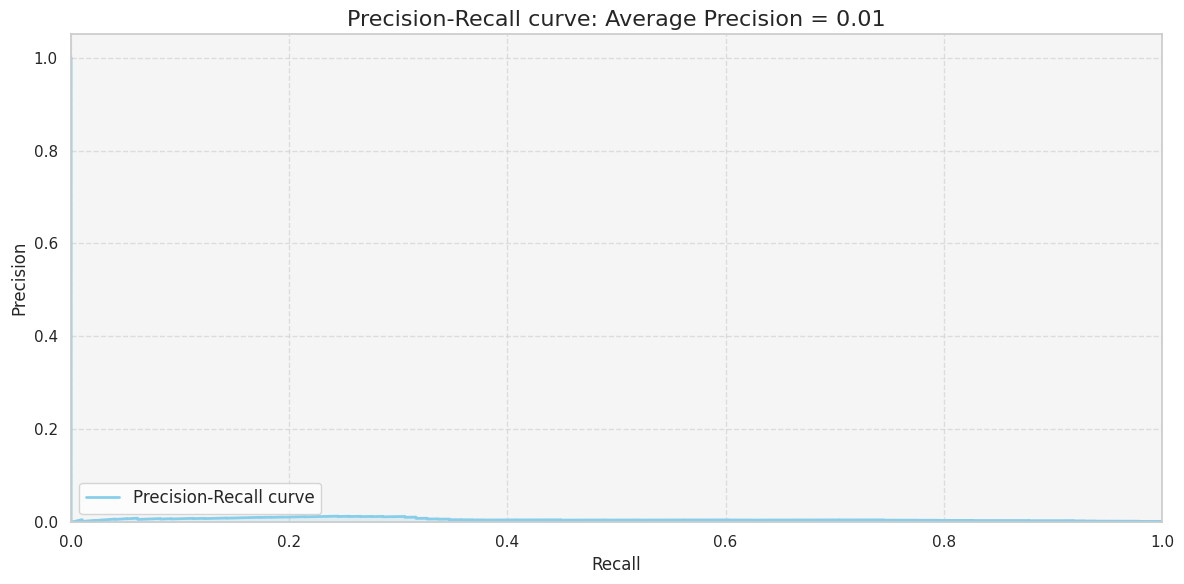

Average Precision Score: 0.006185345332732354


In [20]:
from sklearn.metrics import average_precision_score, precision_recall_curve

y_score = log_reg.decision_function(Original_Xtest) 


precision, recall, _ = precision_recall_curve(Original_ytest, y_score)

# Calculate average precision
average_precision = average_precision_score(Original_ytest, y_score)

# Plot Precision-Recall curve
plt.figure(figsize=(12, 6))
plt.plot(recall, precision, color='skyblue', lw=2, label='Precision-Recall curve')
plt.fill_between(recall, precision, color='skyblue', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision), fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower left', fontsize=12)
plt.tight_layout()
plt.gca().set_facecolor('#f5f5f5')
plt.show()

print("Average Precision Score:", average_precision)


# <a id="21">Confusion Matrix(Undersampling)</a>

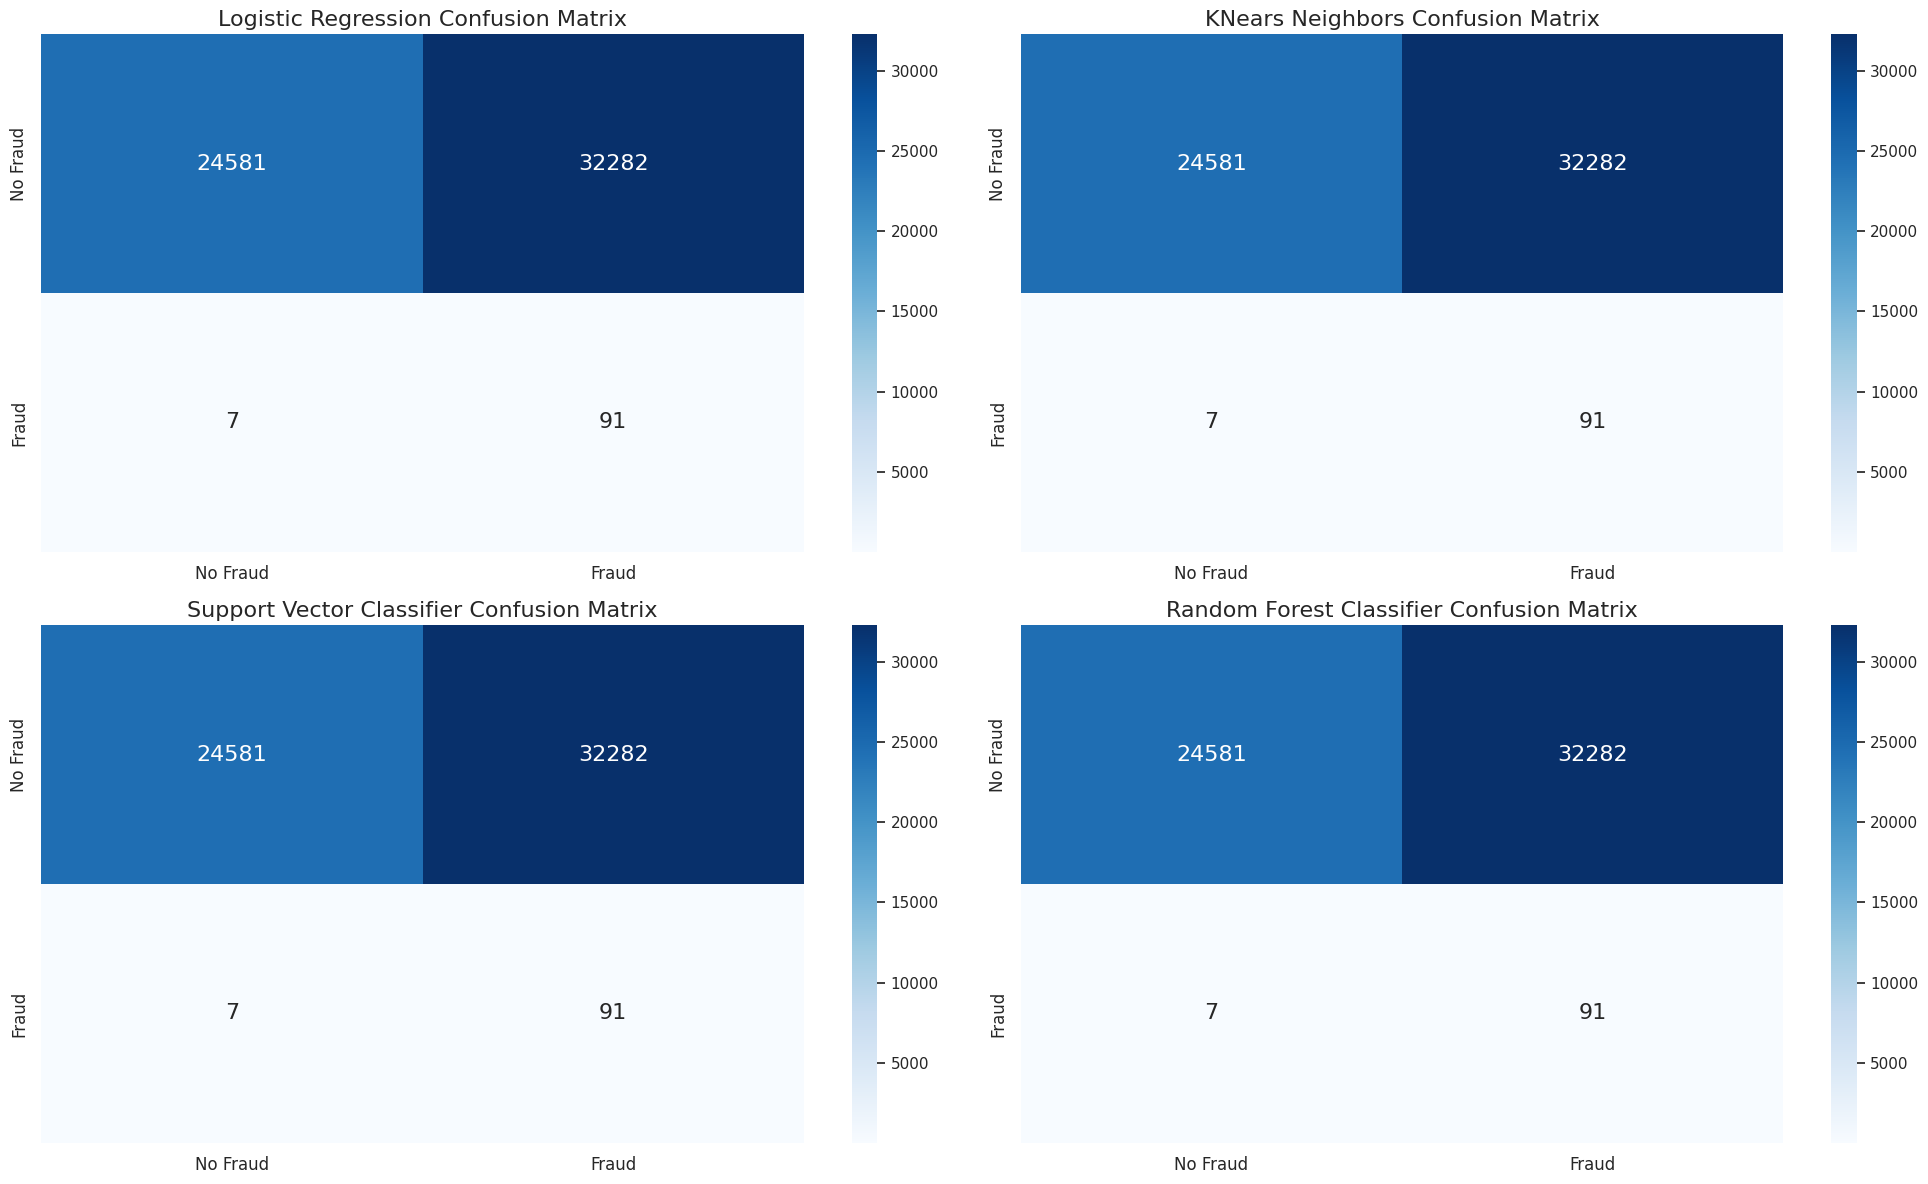

In [21]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = undersample_pipeline.predict(Original_Xtest)
y_pred_knear = undersample_pipeline.predict(Original_Xtest)
y_pred_svc = undersample_pipeline.predict(Original_Xtest)
y_pred_Rf = undersample_pipeline.predict(Original_Xtest)

y_preds = {
    "Logistic Regression": y_pred_log_reg,
    "KNears Neighbors": y_pred_knear,
    "Support Vector Classifier": y_pred_svc,
    "Random Forest Classifier": y_pred_Rf
}

conf_matrices = {model_name: confusion_matrix(undersample_ytest, y_pred) for model_name, y_pred in y_preds.items()}

fig, ax = plt.subplots(2, 2, figsize=(20, 12))

for i, (model_name, conf_matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(conf_matrix, ax=ax[i//2, i%2], annot=True, fmt='d', cmap='Blues', cbar=True, annot_kws={"fontsize": 16})
    ax[i//2, i%2].set_title(f"{model_name} Confusion Matrix", fontsize=16)
    ax[i//2, i%2].tick_params(axis='both', which='major', labelsize=12)
    ax[i//2, i%2].tick_params(axis='both', which='minor', labelsize=10)
    ax[i//2, i%2].set_xticklabels(['No Fraud', 'Fraud'], fontsize=12)
    ax[i//2, i%2].set_yticklabels(['No Fraud', 'Fraud'], fontsize=12)
    
plt.tight_layout()
plt.show()


# <a id="22">SMOTE</a>

**The Wrong Way:**

<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401"><br>

This diagram illustrates the incorrect practice of generating synthetic data points before initiating the cross-validation. By oversampling the minority class before splitting the data into folds, the synthetic data can inadvertently influence the composition of each validation set. This leads to potential data leakage and biased model evaluation, as the validation set may contain artificial data points that were included during the training phase.



**The Right Way:**

<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372"> <br>

In this approach, the synthetic data points (e.g., using SMOTE for handling class imbalances) are generated within each fold of the cross-validation process. This means that for each fold, the training data is first split, and then the minority class is oversampled. This ensures that each validation set remains completely independent and unaffected by the synthetic data, preserving the integrity of the model evaluation process.

**References**:
- [DEALING WITH IMBALANCED DATA: UNDERSAMPLING, OVERSAMPLING AND PROPER CROSS-VALIDATION](https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation)
- [SMOTE explained for noobs](http://rikunert.com/SMOTE_explained)
- [Machine Learning - Over-& Undersampling - Python/ Scikit/ Scikit-Imblearn](https://www.youtube.com/watch?v=DQC_YE3I5ig&t=794s)


In [22]:
X = df.drop('Class', axis=1)
y = df['Class']

skf = StratifiedKFold(n_splits=5, random_state=2, shuffle=True)

SMOTE_accuracy = []
SMOTE_precision = []
SMOTE_recall = []
SMOTE_f1 = []
SMOTE_auc = []

# Store the resampled data
Xsm_train_list = []
ysm_train_list = []


for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    smote_pipeline = make_pipeline(SMOTE(sampling_strategy='minority'),log_reg)
    smote_model= smote_pipeline.fit(X_train, y_train)
    smote_prediction = smote_model.predict(Original_Xtest)
    
    # Resample the training data
    Xsm_train, ysm_train = smote_pipeline.named_steps['smote'].fit_resample(X_train, y_train)
     
    # Append resampled data to lists
    Xsm_train_list.append(Xsm_train)
    ysm_train_list.append(ysm_train)
    
    SMOTE_accuracy.append(smote_pipeline.score(Original_Xtest, Original_ytest))
    SMOTE_precision.append(precision_score(Original_ytest, smote_prediction))
    SMOTE_recall.append(recall_score(Original_ytest, smote_prediction))
    SMOTE_f1.append(f1_score(Original_ytest, smote_prediction))
    SMOTE_auc.append(roc_auc_score(Original_ytest, smote_prediction))

print('---' * 45)
print('')
print("Accuracy: {}".format(np.mean(SMOTE_accuracy)))
print("Precision: {}".format(np.mean(SMOTE_precision)))
print("Recall: {}".format(np.mean(SMOTE_recall)))
print("F1 Score: {}".format(np.mean(SMOTE_f1)))
print("AUC: {}".format(np.mean(SMOTE_auc)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------

Accuracy: 0.9788135741998911
Precision: 0.07004775077029277
Recall: 0.8918367346938775
F1 Score: 0.12960813255387857
AUC: 0.9354001041529463
---------------------------------------------------------------------------------------------------------------------------------------


# <a id="23">Classification Report(SMOTE)</a>  

In [23]:
labels = ['No Fraud', 'Fraud']
print(classification_report(Original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56863
       Fraud       0.07      0.89      0.13        98

    accuracy                           0.98     56961
   macro avg       0.53      0.93      0.56     56961
weighted avg       1.00      0.98      0.99     56961



# <a id="24">Precision-Recall Curve(SMOTE)</a> 

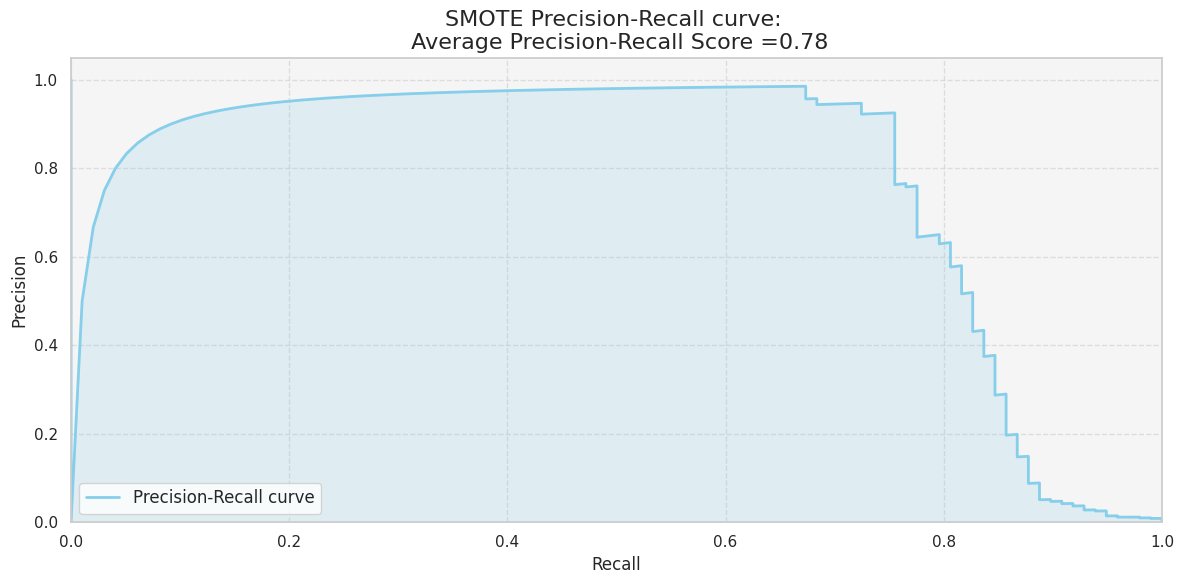

In [24]:
from sklearn.metrics import average_precision_score, precision_recall_curve

y_score = smote_model.decision_function(Original_Xtest)

SMOTE_precision, SMOTE_recall, _ = precision_recall_curve(Original_ytest, y_score)
average_precision = average_precision_score(Original_ytest, y_score)

plt.figure(figsize=(12, 6))
plt.plot(SMOTE_recall, SMOTE_precision, color='skyblue', lw=2, label='Precision-Recall curve')
plt.fill_between(SMOTE_recall, SMOTE_precision, color='skyblue', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('SMOTE Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower left', fontsize=12)
plt.tight_layout()

plt.gca().set_facecolor('#f5f5f5')

plt.show()


In [25]:
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train_list[-1], ysm_train_list[-1])
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :8.077626466751099 sec


# <a id="25">Confusion Matrix(SMOTE)</a> 

A confusion matrix is a summary table used in classification problems to measure the performance of a classification model. It shows the ways in which the classification model is confused when it makes predictions. Specifically, it allows you to see the counts of correct and incorrect predictions broken down by each class.

<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/63b413d2cdc133446aa23fc5_636b9182cfaef2115e028921_HERO_1_Confusion.png" width="500">

Here's how the elements of a confusion matrix are typically arranged and interpreted:

True Positive (TP): The model correctly predicts the positive class.<br>
True Negative (TN): The model correctly predicts the negative class.<br>
False Positive (FP): The model incorrectly predicts the positive class (a type I error).<br>
False Negative (FN): The model incorrectly predicts the negative class (a type II error).<br>

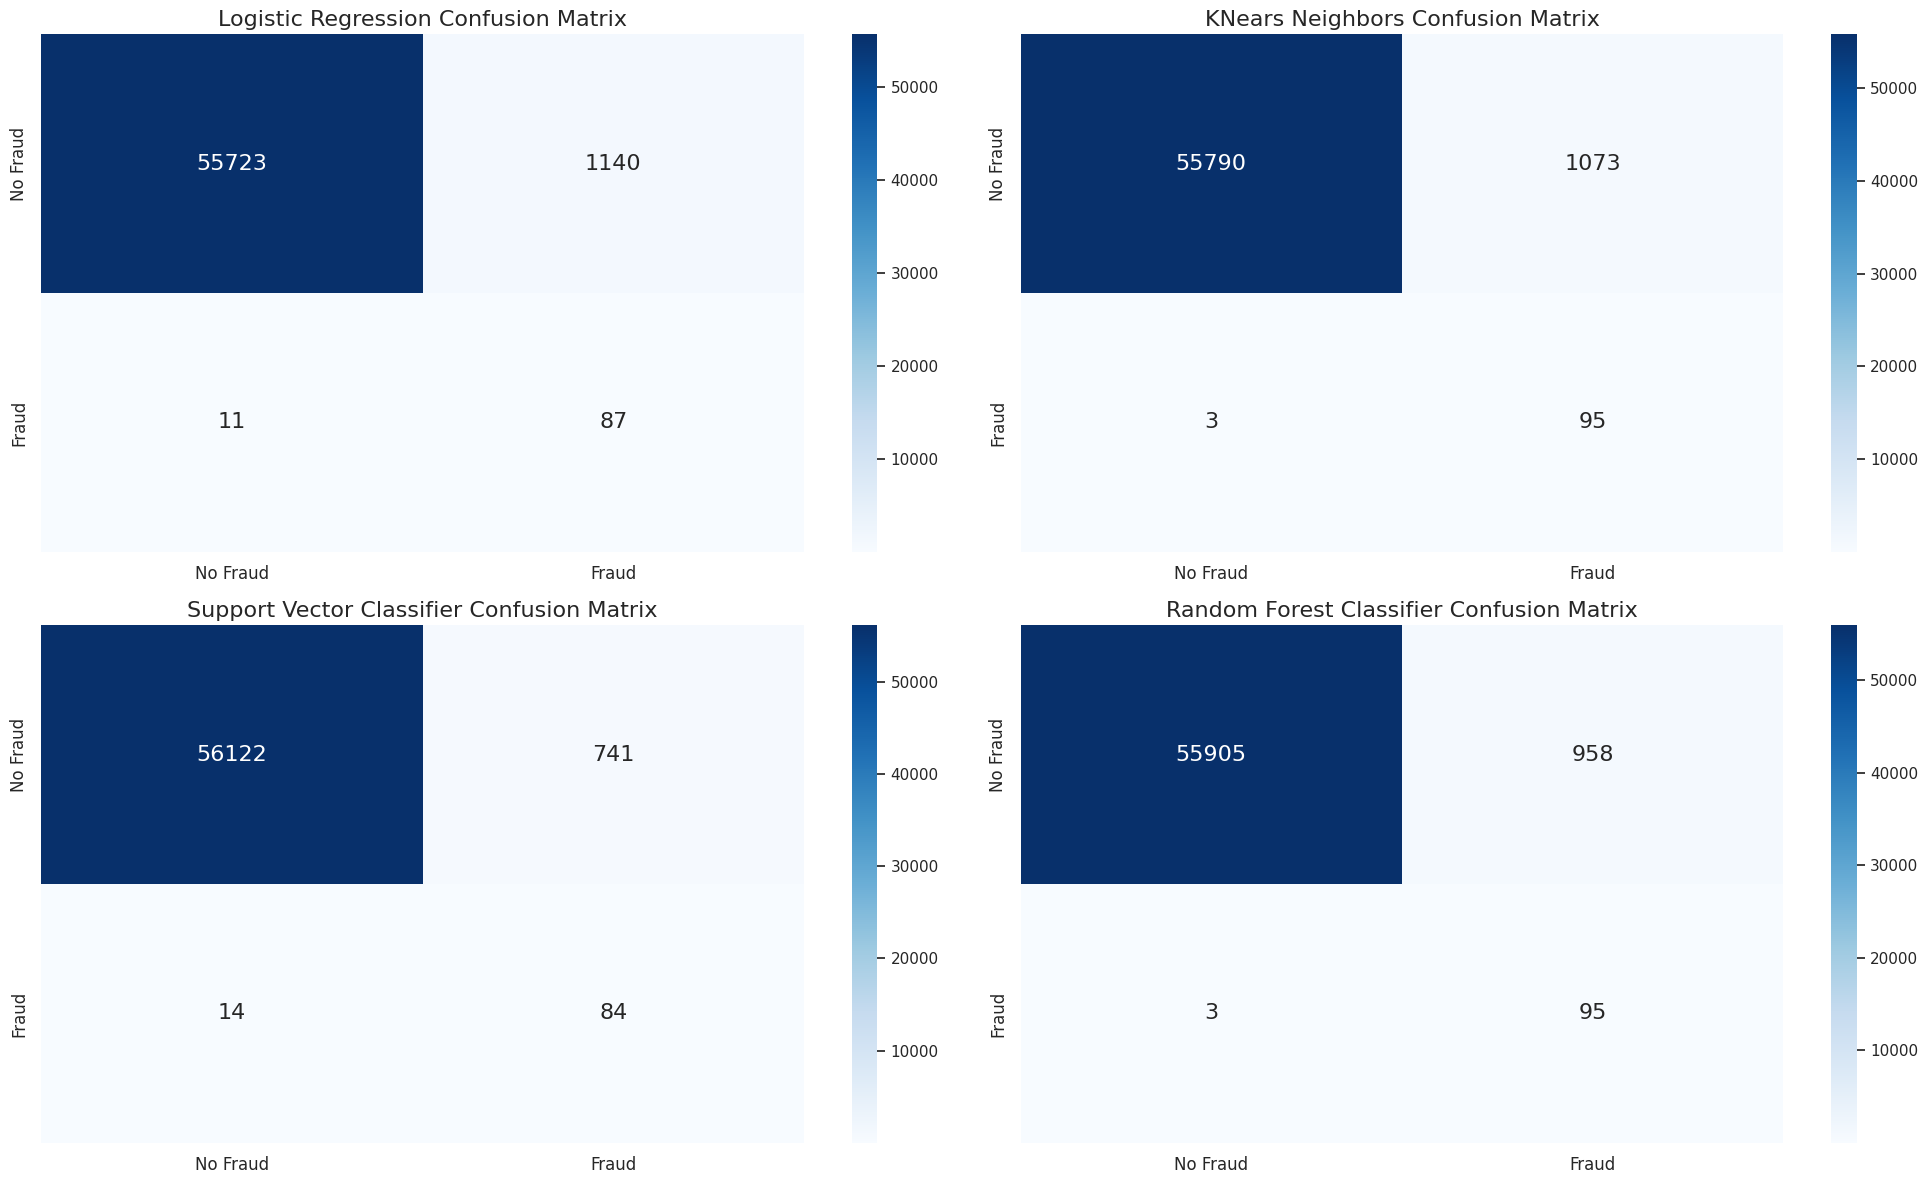

In [26]:
y_pred_log_reg = log_reg_sm.predict(Original_Xtest) 
y_pred_knear = knears_neighbors.predict(Original_Xtest) 
y_pred_svc = svc.predict(Original_Xtest)
y_pred_Rf =rf_clf.predict(Original_Xtest)

y_preds = {
    "Logistic Regression": y_pred_log_reg,
    "KNears Neighbors": y_pred_knear,
    "Support Vector Classifier": y_pred_svc,
    "Random Forest Classifier": y_pred_Rf
}

conf_matrices = {model_name: confusion_matrix(Original_ytest, y_pred) for model_name, y_pred in y_preds.items()}

fig, ax = plt.subplots(2, 2, figsize=(20, 12))

for i, (model_name, conf_matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(conf_matrix, ax=ax[i//2, i%2], annot=True, fmt='d', cmap='Blues', cbar=True,annot_kws={"fontsize": 16})
    ax[i//2, i%2].set_title(f"{model_name} Confusion Matrix", fontsize=16)
    ax[i//2, i%2].tick_params(axis='both', which='major', labelsize=12)
    ax[i//2, i%2].tick_params(axis='both', which='minor', labelsize=10)
    ax[i//2, i%2].set_xticklabels(['No Fraud', 'Fraud'], fontsize=12)
    ax[i//2, i%2].set_yticklabels(['No Fraud', 'Fraud'], fontsize=12)
    
plt.tight_layout()
plt.show()


# <a id="26">Classification Report(All Classifiers)</a> 

**Accuracy:**

The number of samples correctly classified out of all the samples present in the test set.

<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/632067130d342602a9603fe9_RAgj4GXvSP0FG1SmHWBY0w1TISzO9I02v7ipWARCqhdb_d9_qVBNWPwEhNBTSnyg01DQOqbwtjwNbz5dbce0pSVXVM4vu9uN7ubvmx_ppUjw7iMhlZjkcNAOEEGfcHp2_jZxlFtxsT9VwaZs0jnaXk8zzTQAWb19Sw7eCVlrByS9e4hJKZs-NTFpRw.png" width="300">




**Precision (for the positive class):**

The number of samples actually belonging to the positive class out of all the samples that were predicted to be of the positive class by the model.

<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/6320671447fbaf344a222564_1v2JkJWyNcnAx_HvW-7NMkNV0t9Bf1kVxVMBrzWVBYQBuZjlmL1Upd42XgdLtct4dP2RgDK0u99h7xjEUORh_PCpuEDr7E8xpTNtCqXdhwexcX1IIGjK94TZf4wM5a9I9O5xW6On7qDalPCgzU0KWHhIjIDCw9962fWStGqkNCaGWeZqCbm73lrqFg.png" width="300">

**Recall (for the positive class):**

The number of samples predicted correctly to be belonging to the positive class out of all the samples that actually belong to the positive class.

<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/63206714a7b0ab69edff4a53_SzDT0ruxnUvOKnYj_Lh1YjvP1KeBGMCDFccVvbVEQyXOcvB9OCwzFBjnyGhdUMxMqXu8qLYj3VKlWYX_s1kyYZraSGLP60NKqCzIK9Yfz21eyw0mmu0Eew-bacOJfnX8L4CYY9tyu2S5yC9dajGPu1t4FifMppD4ULvLukCaDM89L83ZdA8rF2NZAg.png" width="300">

**F1-Score (for the positive class):**

The harmonic mean of the precision and recall scores obtained for the positive class.

‍<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/632067146ad718f9903f902d_QD8Ny4Rch3QCImxkSlPQ0x0lm-3wSN5hLEMgFbx05TYMwpi6yWTq-2X2E4W9qgugC7tl0JzaMAC6oje3WJcTnnYjQOFhQ1GCMEMisb3soZkIwHpAuPViaNu00zLuFE59oL3RXp_cPrudJhxmCLOQ75xiAGtFNWr8s7iEDqO-kol0-VAVxCSAIRZjGw.png" width="300">

In [27]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(Original_ytest, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(Original_ytest, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(Original_ytest, y_pred_svc))

print('Random Forest Classifier:')
print(classification_report(Original_ytest, y_pred_Rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.07      0.89      0.13        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.56     56961
weighted avg       1.00      0.98      0.99     56961

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.97      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.98      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.86      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.59     56961
weighted

# <a id="27">Conclusions</a>

This project has demonstrated the critical importance of correctly implementing undersampling within the cross-validation process to avoid overfitting and ensure robust model performance. By comparing two approaches—pre-split undersampling and the proper integration of undersampling during cross-validation—we've shown that maintaining the integrity of the testing dataset is key to developing models that generalize well to new data. Adhering to best practices in data preprocessing and model evaluation not only enhances the accuracy of predictions but also upholds the reliability of machine learning models in real-world applications.

# <a id="28">References</a>

- [Credit Fraud: Dealing with Imbalanced Datasets on Kaggle](https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets)
- [Best Techniques and Metrics for Imbalanced Dataset on Kaggle](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
